In [1]:
%pylab ipympl 

from nugridpy import mesa as ms
from nugridpy import nugridse as nuse
from nugridpy import utils as ut

Populating the interactive namespace from numpy and matplotlib


In [2]:
stars = {
         'M15Z02': {'mesa_dir': "/data/nugrid/data/set1ext/set1.2/see_wind/M15.0Z2.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.2/ppd_wind/M15.0Z2.0e-02/H5_out"},

         'M12Z01': {'mesa_dir': "/data/nugrid/data/set1ext/set1.1/see_wind/M12.0Z1.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.1/ppd_wind/M12.0Z1.0e-02/H5_out"},
         'M15Z01': {'mesa_dir': "/data/nugrid/data/set1ext/set1.1/see_wind/M15.0Z1.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.1/ppd_wind/M15.0Z1.0e-02/H5_out"},
         'M20Z01': {'mesa_dir': "/data/nugrid/data/set1ext/set1.1/see_wind/M20.0Z1.0e-02/LOGS",
                    'mppnp_dir': "/data/nugrid/data/set1ext/set1.1/ppd_wind/M20.0Z1.0e-02/H5_out"}
        }

star_keys = stars.keys()

In [3]:
for star in star_keys:
    stars[star]['mesa']   = ms.star_log(stars[star]['mesa_dir'])
    stars[star]['nugrid'] = nuse.se(stars[star]['mppnp_dir'])

Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.
Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.
Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.
Using old star.logsa file ...
 reading ...100% 

Searching files, please wait.......
Reading preprocessor files
File search complete.


In [6]:
prof = ms.mesa_profile(stars["M15Z02"]["mesa_dir"], num=9200)

423 in profiles.index file ...
Found and load nearest profile for cycle 9200
reading profile/data/nugrid/data/set1ext/set1.2/see_wind/M15.0Z2.0e-02/LOGS/log193.data ...
 reading ...100% 



(0.0, 200.0)

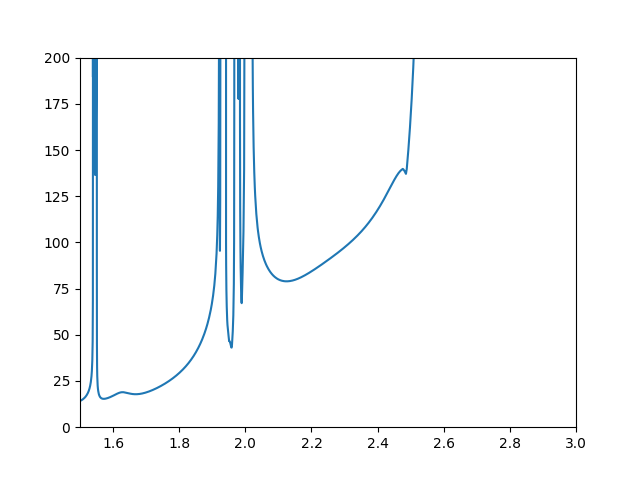

In [19]:
l = prof.get('mlt_mixing_length')
vconv = np.power(10,prof.get('log_conv_vel'))
mass = prof.get('mass')

ifig=1;plt.close(ifig);plt.figure(ifig);

plt.plot(mass, l/(vconv))
plt.xlim(1.5,3)
plt.ylim(0,200)



In [4]:
def plotting(key, cycle, ifig, mass_range):

    pt   = stars[key]['nugrid']
    prof = ms.mesa_profile(stars[key]['mesa_dir'], num=cycle)
    
    params = ['mass', 'dcoeff', 'C-12', 'O-16', 'Ne-20', 'Si-28', 'P-31', 'Cl-35', 'K-39', 'Sc-45', 'Mg-24', 'S-32', 'radius']
    loaded = {param: pt.get(cycle, param) for param in params}

    close(ifig)

    fig = plt.figure(num=ifig, figsize=(12,6))
    fig.suptitle(f'cycle {cycle}')
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.4])

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1], sharex=ax0)
    ax2 = fig.add_subplot(gs[1, :], sharex=ax0)
    
    ax0.set_xlim(mass_range[0], mass_range[1])
    ax0.set_ylabel(r'$X$ (mass fraction)')
    ax2.set_xlabel(r'$m/M_\odot$')
    
    #i = np.argmin(np.abs(1.55-loaded['mass']))
    #k = np.argmin(np.abs(1.78-loaded['mass']))
    #q = np.argmin(np.abs(1.955-loaded['mass']))
    #j = np.argmin(np.abs(2.1-loaded['mass']))
    
    #oshell = round((loaded['radius'][k] - loaded['radius'][i])*700*50,)
    #intershell = round((loaded['radius'][q] - loaded['radius'][k])*700*50,)
    #cshell = round((loaded['radius'][j] - loaded['radius'][q])*700*50,)
    #print("\nAssuming a 896^3 grid with 9 Mm radius")
    #print(f"O-shell: {oshell} cells\nInter-shell: {intershell} cells\nC-shell: {cshell} cells")

    # the main isotopes   
    for c, iso in enumerate(['C-12', 'O-16', 'Ne-20', 'Si-28'], 0):
        ax0.semilogy(loaded['mass'], loaded[iso], color=ut.linestylecb(c)[2], linestyle=ut.linestylecb(c)[0], label=iso)
        
    ax0.set_ylim(1e-4, 1.5)
    ax0.legend(loc='lower right', ncol=2, fontsize='xx-small')

    # the odd-Z isotopes
    for c, iso in enumerate(['P-31', 'Cl-35', 'K-39', 'Sc-45'], 4): 
        ax1.semilogy(loaded['mass'], loaded[iso], color=ut.linestylecb(c)[2], linestyle=ut.linestylecb(c)[0], label=iso)

    ax1.set_ylim(1e-9, 1.5)
    ax1.legend(loc='lower right', ncol=2, fontsize='xx-small')

    # stellar structure
    ax2.semilogy(loaded['mass'], loaded['dcoeff'], linestyle='dotted', color='black', label=r'$D_{\mathrm{mix}}$')
    
    mmass, meps_si = prof.get('mass'), prof.get('burn_si')
    ax2.semilogy(mmass, meps_si, linestyle='dotted', color='red', label=r'$\epsilon_{\mathrm{Si}}$')
    ax2.legend(loc='upper left', ncol=2, fontsize='xx-small')
    ax2.set_ylim(1e8, 1e25)

In [5]:
stars['M12Z01']["properties"] = {"size": [1.53,2.13], "model_num": [11420,15000]}
stars['M15Z01']["properties"] = {"size": [1.61,3.13], "model_num": [8900,11440]}
stars['M20Z01']["properties"] = {"size": [1.35,4.95],  "model_num": [11900,14860]}
stars['M15Z02']["properties"] = {"size": [1.55,2.98], "model_num": [9160,11480]}

In [6]:
def close_idx(arr, data): return np.argmin(np.abs(arr-data))

In [7]:
for star in star_keys:
    analysis = stars[star]['mesa']
    prop = stars[star]["properties"]
    
    
    mn = analysis.get('model_number')
    age = analysis.get('star_age')
    
    i,j = close_idx(mn,prop["model_num"][0]), close_idx(mn,prop["model_num"][1])
        
    tau_OC = ((age[j]-age[i])*8760)
    size_OC = prop["size"][1] - prop["size"][0]
    
    massini, massfin = stars[star]['nugrid'].get(prop["model_num"][0], "mass"), stars[star]['nugrid'].get(prop["model_num"][1], "mass")
    k39ini, k39fin = stars[star]['nugrid'].get(prop["model_num"][0], "K-39"), stars[star]['nugrid'].get(prop["model_num"][1], "K-39")
    k40ini, k40fin = stars[star]['nugrid'].get(prop["model_num"][0], "K-40"), stars[star]['nugrid'].get(prop["model_num"][1], "K-40")
    k41ini, k41fin = stars[star]['nugrid'].get(prop["model_num"][0], "K-41"), stars[star]['nugrid'].get(prop["model_num"][1], "K-41")

    res = []
    for m,k in zip([massini, massini, massini, massfin, massfin, massfin], [k39ini, k40ini, k41ini, k39fin, k40fin, k41fin]):
        
        i,j = close_idx(m, prop["size"][0]), close_idx(m, prop["size"][1])
        
        avgk = np.average(k[i:j])
        res.append(avgk)
        
    stars[star]["properties"]["tau_OC"] = tau_OC
    stars[star]["properties"]["size_OC"] = size_OC
    stars[star]["properties"]["k39ini"] = res[0]
    stars[star]["properties"]["k39fin"] = res[3]
    stars[star]["properties"]["k39OP"] = np.log10(res[3]/res[0])
    stars[star]["properties"]["k40ini"] = res[1]
    stars[star]["properties"]["k40fin"] = res[4]
    stars[star]["properties"]["k40OP"] = np.log10(res[4]/res[1])
    stars[star]["properties"]["k41ini"] = res[2]
    stars[star]["properties"]["k41fin"] = res[5]
    stars[star]["properties"]["k41OP"] = np.log10(res[5]/res[2])

 reading ['iso_massf']...100%

In [8]:
print("NuGrid O-C Properties")
print("---------------------")

for star in star_keys:
    print(star)
    
    _,_,tau_OC,size_OC,k39ini,k39fin,k39OP,k40ini,k40fin,k40OP,k41ini,k41fin,k41OP=stars[star]["properties"].values()
    print('\tDuration:',round(tau_OC,3),'hr')
    print('\tSize:',round(size_OC,2),'Msun')
    print('\tK-39:', f'{k39ini:.2e}', f'{k39fin:.2e}', round(k39OP,3))
    print('\tK-40:', f'{k40ini:.2e}', f'{k40fin:.2e}', round(k40OP,3))
    print('\tK-41:', f'{k41ini:.2e}', f'{k41fin:.2e}', round(k41OP,3))
    
    """
    mzams, Z = star[1:3], '0.'+star[4:]
    
    frontk39, backk39 = f"{k39fin:.2e}".split('e')
    frontk40, backk40 = f"{k40fin:.2e}".split('e')
    frontk41, backk41 = f"{k41fin:.2e}".split('e')

    print(
        f"{mzams} & {Z} & {round(size_OC, 2)} & {round(tau_OC, 3)} & "
        f"\\natlog{{{frontk39}}}{{{int(backk39)}}} & {round(k39OP, 3)} & "
        f"\\natlog{{{frontk40}}}{{{int(backk40)}}} & {round(k40OP, 3)} & "
        f"\\natlog{{{frontk41}}}{{{int(backk41)}}} & {round(k41OP, 3)} "
    )
    """

NuGrid O-C Properties
---------------------
M15Z02
	Duration: 1.252 hr
	Size: 1.43 Msun
	K-39: 8.85e-06 9.43e-04 2.028
	K-40: 6.34e-07 5.85e-05 1.965
	K-41: 1.18e-06 2.38e-05 1.305
M12Z01
	Duration: 0.029 hr
	Size: 0.6 Msun
	K-39: 7.31e-06 2.48e-04 1.531
	K-40: 2.92e-07 6.72e-06 1.362
	K-41: 4.85e-07 1.49e-06 0.487
M15Z01
	Duration: 0.74 hr
	Size: 1.52 Msun
	K-39: 3.16e-06 3.01e-04 1.98
	K-40: 3.78e-07 3.24e-05 1.934
	K-41: 6.34e-07 2.71e-05 1.63
M20Z01
	Duration: 5.43 hr
	Size: 3.6 Msun
	K-39: 3.29e-06 2.28e-04 1.841
	K-40: 4.54e-07 3.56e-06 0.895
	K-41: 6.95e-07 7.01e-07 0.004


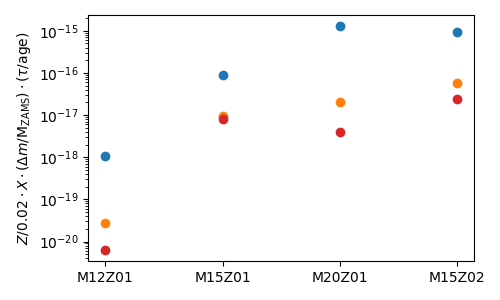

In [9]:
ifig=1; plt.close(ifig); plt.figure(ifig, figsize=(5,3))

for star in list(star_keys)[1:] + [list(star_keys)[0]]:
    
    _,_,tau_OC,size_OC,k39ini,k39fin,k39OP,k40ini,k40fin,k40OP,k41ini,k41fin,k41OP=stars[star]["properties"].values()

    mzams, Z = float(star[1:3]), float('0.'+star[4:])
    agefin = stars[star]['mesa'].get('star_age')[-1] * 8760

    plt.scatter(star, Z/0.02*k39fin*(size_OC/mzams)*(tau_OC/agefin),c='tab:blue')
    plt.scatter(star, Z/0.02*k40fin*(size_OC/mzams)*(tau_OC/agefin),c='tab:orange')
    plt.scatter(star, Z/0.02*k41fin*(size_OC/mzams)*(tau_OC/agefin),c='tab:red')
    
    
plt.ylabel(r"$Z/0.02\cdot X \cdot (\Delta m/\mathrm{M_{ZAMS}}) \cdot (\tau/\mathrm{age})$")

plt.yscale('log')

plt.tight_layout()

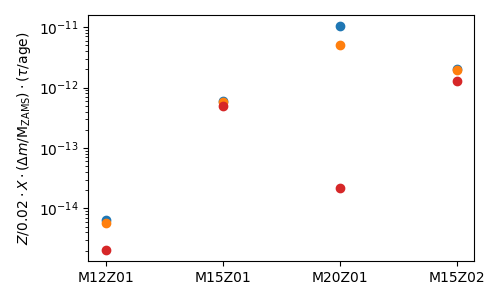

In [10]:
ifig=2; plt.close(ifig); plt.figure(ifig, figsize=(5,3))

for star in list(star_keys)[1:] + [list(star_keys)[0]]:
    
    _,_,tau_OC,size_OC,k39ini,k39fin,k39OP,k40ini,k40fin,k40OP,k41ini,k41fin,k41OP=stars[star]["properties"].values()

    mzams, Z = int(star[1:3]), float('0.'+star[4:])
    agefin = stars[star]['mesa'].get('star_age')[-1] * 8760

    plt.scatter(star, Z/0.02*k39OP*(size_OC/mzams)*(tau_OC/agefin),c='tab:blue')
    plt.scatter(star, Z/0.02*k40OP*(size_OC/mzams)*(tau_OC/agefin),c='tab:orange')
    plt.scatter(star, Z/0.02*k41OP*(size_OC/mzams)*(tau_OC/agefin),c='tab:red')
    
    
plt.ylabel(r"$Z/0.02\cdot X \cdot (\Delta m/\mathrm{M_{ZAMS}}) \cdot (\tau/\mathrm{age})$")

plt.yscale('log')

plt.tight_layout()